In [23]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd

df = pd.read_csv("classification.csv")
print len(df.index)

Populating the interactive namespace from numpy and matplotlib
200


Заполните таблицу ошибок классификации. Для этого подсчитайте величины TP, FP, FN и TN согласно их определениям. Например, FP — это количество объектов, имеющих класс 0, но отнесенных алгоритмом к классу 1. Ответ в данном вопросе — четыре числа через пробел.

In [27]:
true_positive = len(df[(df['true'] == df['pred']) & df['true']].index)
true_negative = len(df[(df['true'] == df['pred']) & (df['true'] == 0)].index)
false_positive = len(df[(df['true'] != df['pred']) & (df['true'] == 0)].index)
false_negative = len(df[(df['true'] != df['pred']) & df['true']].index)
print true_positive, false_positive, false_negative, true_negative
print sum([true_positive, false_positive, false_negative, true_negative])

43 34 59 64
200


In [28]:
with open("submissions/3_4.txt", "w") as f:
    f.write("43 34 59 64")

Посчитайте основные метрики качества классификатора:
* Accuracy (доля верно угаданных) — sklearn.metrics.accuracy_score
* Precision (точность) — sklearn.metrics.precision_score
* Recall (полнота) — sklearn.metrics.recall_score
* F-мера — sklearn.metrics.f1_score

В качестве ответа укажите эти четыре числа через пробел.

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print accuracy_score(df['true'], df['pred']), precision_score(df['true'], df['pred']), recall_score(df['true'], df['pred']), f1_score(df['true'], df['pred'])

0.535 0.558441558442 0.421568627451 0.480446927374


In [30]:
with open("submissions/3_5.txt", "w") as f:
    f.write("0.54 0.56 0.42 0.48")

Имеется четыре обученных классификатора. В файле scores.csv записаны истинные классы и значения степени принадлежности положительному классу для каждого классификатора на некоторой выборке:

* для логистической регрессии — вероятность положительного класса (колонка score_logreg),
* для SVM — отступ от разделяющей поверхности (колонка score_svm),
* для метрического алгоритма — взвешенная сумма классов соседей (колонка score_knn),
* для решающего дерева — доля положительных объектов в листе (колонка score_tree).

In [31]:
scores = pd.read_csv("scores.csv")

Посчитайте площадь под ROC-кривой для каждого классификатора. Какой классификатор имеет наибольшее значение метрики AUC-ROC (укажите название столбца)? Воспользуйтесь функцией sklearn.metrics.roc_auc_score.

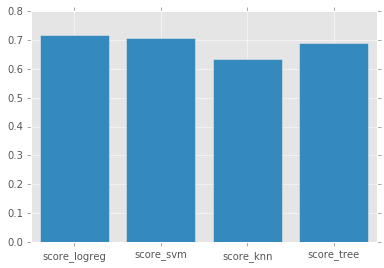

In [46]:
from sklearn.metrics import roc_auc_score

columns = scores.columns[1:]
roc_aucs = [roc_auc_score(scores['true'], scores[f]) for f in columns]
f = pylab.figure()
ax = f.add_axes([0.1, 0.1, 0.8, 0.8])
ax.bar(range(4), roc_aucs, align='center')
ax.set_xticks(range(4))
ax.set_xticklabels(columns)
f.show()

In [44]:
with open("submissions/3_6.txt", "w") as f:
    f.write("score_logreg")

Какой классификатор достигает наибольшей точности (Precision) при полноте (Recall) не менее 70% ? Какое значение точности при этом получается?

Чтобы получить ответ на этот вопрос, найдите все точки precision-recall-кривой с помощью функции sklearn.metrics.precision_recall_curve. Она возвращает три массива: precision, recall, thresholds. В них записаны точность и полнота при определенных порогах, указанных в массиве thresholds. Найдите максимальной значение точности среди тех записей, для которых полнота не меньше, чем 0.7.

In [50]:
from sklearn.metrics import precision_recall_curve

for f in scores.columns[1:]:
    precision, recall, threshold = precision_recall_curve(scores['true'], scores[f])
    print f, precision[recall > 0.7].max()

score_logreg 0.63025210084
score_svm 0.622807017544
score_knn 0.606557377049
score_tree 0.651785714286


In [51]:
with open("submissions/3_7.txt", "w") as f:
    f.write("score_tree")